In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
mouse = pd.read_csv('data/mouse_expression.csv.gz', index_col=0)
mouse

,mouse_adipose_1,mouse_brain_4,mouse_heart_5,mouse_kidney_5,mouse_liver_5,mouse_lung_1,mouse_pancreas_1,mouse_spleen_4
Stag2,3223,3588,1780,7455,3264,9169,400,10345
Stag1,2750,1429,824,2874,1111,2242,170,4345
Gosr2,1599,689,259,1200,831,912,192,3643
4933434E20Rik,706,683,331,790,449,1226,71,2006
Art5,0,0,5,0,0,0,0,2
...,...,...,...,...,...,...,...,...
Fam83e,17,0,0,0,0,19,0,4
Fam83b,63,2,3,43,0,18,5,4
Fam83f,42,2,0,5,7,0,9,42
Fam83h,99,3,0,22,22,7,66,20


In [4]:
human = pd.read_csv('data/human_expression.csv.gz', index_col=0)
human

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
STAG2,1430,2513,1734,1159,1262,3690,578,2433
STAG1,835,958,1197,383,758,885,447,787
GOSR2,142,40,187,54,87,63,92,58
C1orf43,1856,3196,4839,2069,2674,4647,1181,1357
ART5,1,0,17,0,0,6,1,0
...,...,...,...,...,...,...,...,...
FAM83E,1,0,0,0,0,4,1,0
FAM83B,3,0,4,41,10,4,16,0
FAM83F,9,3,3,1,3,0,7,0
FAM83H,40,54,8,57,148,73,159,21


In [5]:
gene_map = pd.read_csv('data/human_mouse_gene_map.csv.gz', index_col=0)
gene_map

,human,mouse
Stag2_STAG2,STAG2,Stag2
Stag1_STAG1,STAG1,Stag1
Gosr2_GOSR2,GOSR2,Gosr2
4933434E20Rik_C1orf43,C1orf43,4933434E20Rik
Art5_ART5,ART5,Art5
...,...,...
Fam83e_FAM83E,FAM83E,Fam83e
Fam83b_FAM83B,FAM83B,Fam83b
Fam83f_FAM83F,FAM83F,Fam83f
Fam83h_FAM83H,FAM83H,Fam83h


In [12]:
human.sum()

human_adipose_3     13913058
human_brain_4       10131148
human_heart_2       32415243
human_kidney_2       8457567
human_liver_2       21656293
human_lung_3        11545569
human_pancreas_4     6116793
human_spleen_2       6799719
dtype: int64

In [16]:
human.sum(1)

STAG2      14799
STAG1       6250
GOSR2        723
C1orf43    21819
ART5          25
           ...  
FAM83E         6
FAM83B        78
FAM83F        26
FAM83H       560
FAM83G       168
Length: 14744, dtype: int64

In [17]:
human.sum(1).describe()

count    1.474400e+04
mean     7.530886e+03
std      1.099311e+05
min      0.000000e+00
25%      2.050000e+02
50%      1.463000e+03
75%      4.833000e+03
max      7.534021e+06
dtype: float64

In [18]:
human[human.sum(1) == 0]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
GATA1,0,0,0,0,0,0,0,0
SCT,0,0,0,0,0,0,0,0
PSAPL1,0,0,0,0,0,0,0,0
PRR9,0,0,0,0,0,0,0,0
CST11,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
HIST1H1A,0,0,0,0,0,0,0,0
CRX,0,0,0,0,0,0,0,0
GSC2,0,0,0,0,0,0,0,0
DEFB131,0,0,0,0,0,0,0,0


In [19]:
human[~human.sum(1).eq(0)]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
STAG2,1430,2513,1734,1159,1262,3690,578,2433
STAG1,835,958,1197,383,758,885,447,787
GOSR2,142,40,187,54,87,63,92,58
C1orf43,1856,3196,4839,2069,2674,4647,1181,1357
ART5,1,0,17,0,0,6,1,0
...,...,...,...,...,...,...,...,...
FAM83E,1,0,0,0,0,4,1,0
FAM83B,3,0,4,41,10,4,16,0
FAM83F,9,3,3,1,3,0,7,0
FAM83H,40,54,8,57,148,73,159,21


In [20]:
human[human.sum(1).gt(0)]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
STAG2,1430,2513,1734,1159,1262,3690,578,2433
STAG1,835,958,1197,383,758,885,447,787
GOSR2,142,40,187,54,87,63,92,58
C1orf43,1856,3196,4839,2069,2674,4647,1181,1357
ART5,1,0,17,0,0,6,1,0
...,...,...,...,...,...,...,...,...
FAM83E,1,0,0,0,0,4,1,0
FAM83B,3,0,4,41,10,4,16,0
FAM83F,9,3,3,1,3,0,7,0
FAM83H,40,54,8,57,148,73,159,21


In [23]:
print(human.columns)
human[[c for c in human.columns if "brain" in c]]

Index(['human_adipose_3', 'human_brain_4', 'human_heart_2', 'human_kidney_2',
       'human_liver_2', 'human_lung_3', 'human_pancreas_4', 'human_spleen_2'],
      dtype='object')


,human_brain_4
STAG2,2513
STAG1,958
GOSR2,40
C1orf43,3196
ART5,0
...,...
FAM83E,0
FAM83B,0
FAM83F,3
FAM83H,54


In [22]:
human.loc[[g for g in human.index if "DLX" in g]]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,9,0,0,0,0,19,2,4
DLX5,5,55,1,0,0,0,0,1
DLX3,5,0,0,1,0,2,6,0
DLX6,4,142,0,0,0,0,0,0
DLX1,2,24,2,0,0,0,1,0
DLX2,1,4,0,0,0,0,0,0


In [29]:
brain_col = [c for c in human.columns if "brain" in c]
dlx_rows = [g for g in human.index if "DLX" in g]
n_rows, n_cols = human.loc[dlx_rows,brain_col].shape
print(f"subset has :{n_rows} rows, and {n_cols} cols")
human.loc[dlx_rows,brain_col]


subset has :6 rows, and 1 cols


,human_brain_4
DLX4,0
DLX5,55
DLX3,0
DLX6,142
DLX1,24
DLX2,4


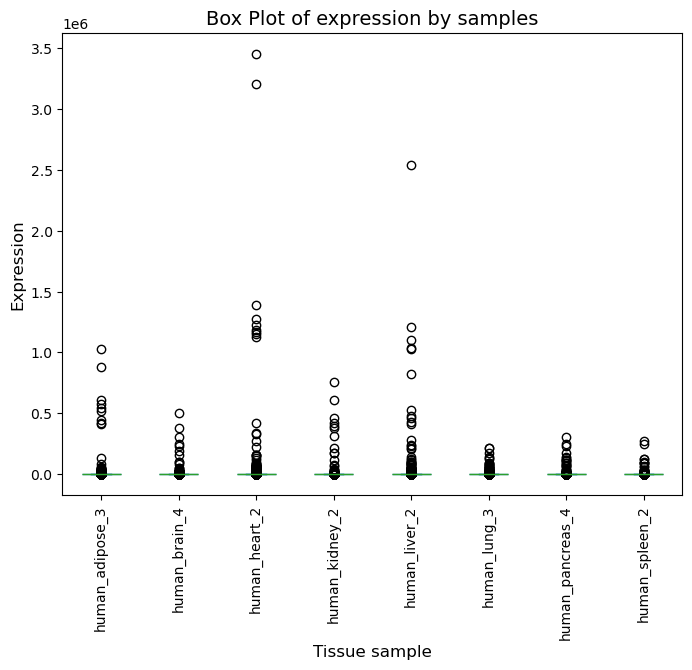

In [92]:
ax = human.plot.box(figsize=(8, 6), patch_artist=True)
colors = [
    "lightblue",     # Soft blue
    "lightgreen",    # Soft green
    "lightpink",     # Soft pink
    "lightsalmon",   # Soft orange-pink
    "lightyellow",   # Pale yellow
    "powderblue",    # Light gray-blue
    "lavender",      # Light purple
    "thistle"        # Soft lavender-pink
]

for patch, color in zip(ax.artists, colors):  # 
    patch.set_facecolor(color)

# Customize plot appearance
plt.title("Box Plot of expression by samples", fontsize=14)
plt.xlabel("Tissue sample", fontsize=12)
plt.ylabel("Expression", fontsize=12)
plt.xticks(rotation=90)
plt.show()


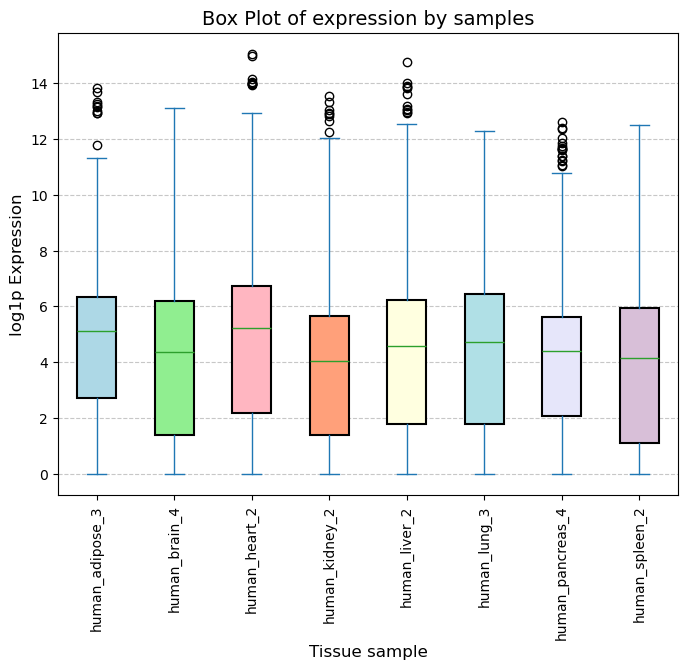

In [42]:
ax = np.log1p(human).plot.box(figsize=(8, 6), patch_artist=True)

for i, patch in enumerate(ax.patches[:len(human.columns)]):  # Ensure one color per box
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor("black")   # Optional: Set edge color
    patch.set_linewidth(1.5)       # Optional: Make edges thicker


# Customize plot appearance
plt.title("Box Plot of expression by samples", fontsize=14)
plt.xlabel("Tissue sample", fontsize=12)
plt.ylabel("log1p Expression", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [55]:
normed_human = human.div(human.sum(axis=0), axis=1)*1e6
normed_human.loc[dlx_rows]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,0.646874,0.000000,0.000000,0.000000,0.0,1.645653,0.326969,0.588260
DLX5,0.359375,5.428802,0.030850,0.000000,0.0,0.000000,0.000000,0.147065
DLX3,0.359375,0.000000,0.000000,0.118237,0.0,0.173227,0.980906,0.000000
DLX6,0.287500,14.016181,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
DLX1,0.143750,2.368932,0.061699,0.000000,0.0,0.000000,0.163484,0.000000
DLX2,0.071875,0.394822,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [56]:
human.loc[dlx_rows]

,human_adipose_3,human_brain_4,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,9,0,0,0,0,19,2,4
DLX5,5,55,1,0,0,0,0,1
DLX3,5,0,0,1,0,2,6,0
DLX6,4,142,0,0,0,0,0,0
DLX1,2,24,2,0,0,0,1,0
DLX2,1,4,0,0,0,0,0,0


In [89]:
ref = "human_brain_4"
a = normed_human.loc[dlx_rows,ref]
col_subset = normed_human.columns[normed_human.columns != ref]
normed_fold_changes = {}
for c in col_subset:
    b = normed_human.loc[dlx_rows,c]
    normed_fold_changes[c] = (b-a)/a

normed_fold_changes = pd.DataFrame(normed_fold_changes).fillna(0)
col_subset = normed_human.columns != ref
normed_fold_changes = normed_fold_changes.mask(np.isinf(normed_fold_changes),
                                 normed_human.loc[dlx_rows,col_subset])

normed_fold_changes

,human_adipose_3,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,0.646874,0.000000,0.000000,0.0,1.645653,0.326969,0.58826
DLX5,-0.933802,-0.994317,-1.000000,-1.0,-1.000000,-1.000000,-0.97291
DLX3,0.359375,0.000000,0.118237,0.0,0.173227,0.980906,0.00000
DLX6,-0.979488,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.00000
DLX1,-0.939319,-0.973955,-1.000000,-1.0,-1.000000,-0.930988,-1.00000
DLX2,-0.817956,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.00000


In [74]:
ref = "human_brain_4"
col_subset = human.columns[human.columns != ref]
a = human.loc[dlx_rows,ref]
fold_changes = {}

for c in col_subset:
    b = human.loc[dlx_rows,c]
    fold_changes[c] = (b-a)/a

fold_changes = pd.DataFrame(fold_changes).fillna(0)
fold_changes = fold_changes.mask(np.isinf(fold_changes),
                                 human.loc[dlx_rows,col_subset])

fold_changes


,human_adipose_3,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,9.000000,0.000000,0.0,0.0,19.0,2.000000,4.000000
DLX5,-0.909091,-0.981818,-1.0,-1.0,-1.0,-1.000000,-0.981818
DLX3,5.000000,0.000000,1.0,0.0,2.0,6.000000,0.000000
DLX6,-0.971831,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000
DLX1,-0.916667,-0.916667,-1.0,-1.0,-1.0,-0.958333,-1.000000
DLX2,-0.750000,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.000000


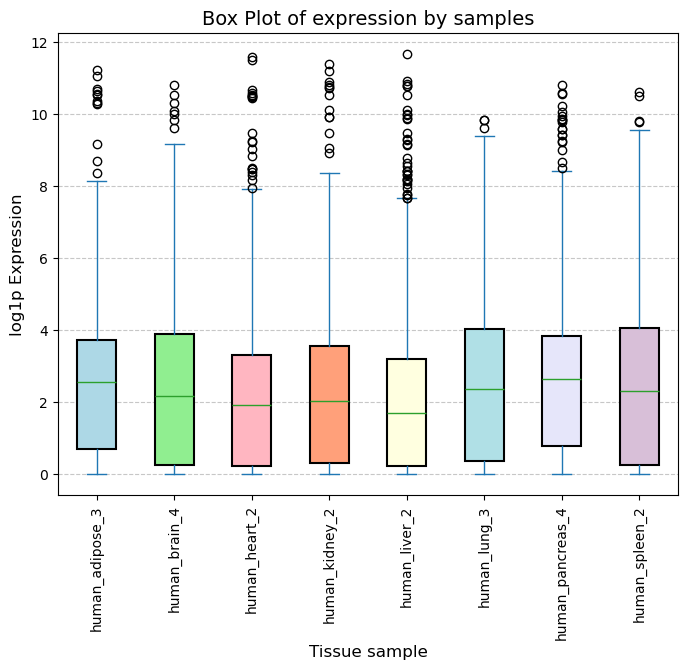

In [75]:
ax = np.log1p(normed_human).plot.box(figsize=(8, 6), patch_artist=True)

for i, patch in enumerate(ax.patches[:len(human.columns)]):  # Ensure one color per box
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor("black")   # Optional: Set edge color
    patch.set_linewidth(1.5)       # Optional: Make edges thicker


# Customize plot appearance
plt.title("Box Plot of expression by samples", fontsize=14)
plt.xlabel("Tissue sample", fontsize=12)
plt.ylabel("log1p Expression", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [77]:
log1p_normed_human = np.log1p(normed_human)
ref = "human_brain_4"
a = log1p_normed_human.loc[dlx_rows,ref]
col_subset = normed_human.columns[normed_human.columns != ref]
l1p_normed_fold_changes = {}
for c in col_subset:
    b = log1p_normed_human.loc[dlx_rows,c]
    l1p_normed_fold_changes[c] = (b-a)/a

l1p_normed_fold_changes = pd.DataFrame(l1p_normed_fold_changes).fillna(0)
col_subset = normed_human.columns != ref
l1p_normed_fold_changes = l1p_normed_fold_changes.mask(np.isinf(l1p_normed_fold_changes),
                                 log1p_normed_human.loc[dlx_rows,col_subset])

l1p_normed_fold_changes

,human_adipose_3,human_heart_2,human_kidney_2,human_liver_2,human_lung_3,human_pancreas_4,human_spleen_2
DLX4,0.498879,0.000000,0.000000,0.0,0.972918,0.282897,0.462639
DLX5,-0.835003,-0.983672,-1.000000,-1.0,-1.000000,-1.000000,-0.926264
DLX3,0.307025,0.000000,0.111754,0.0,0.159758,0.683554,0.000000
DLX6,-0.906722,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000
DLX1,-0.889418,-0.950707,-1.000000,-1.0,-1.000000,-0.875334,-1.000000
DLX2,-0.791417,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000


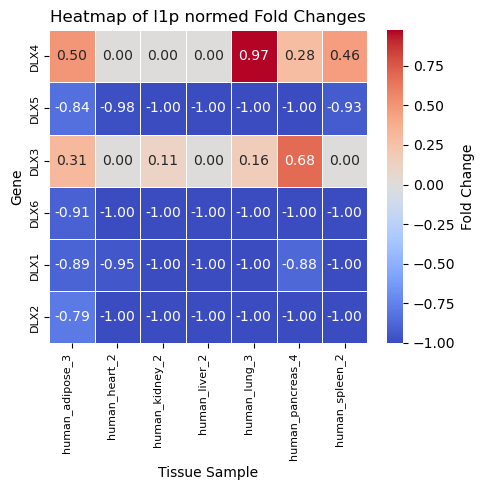

In [83]:
# sns.heatmap(l1p_normed_fold_changes, cmap="viridis")
# Plot heatmap
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
sns.heatmap(
    l1p_normed_fold_changes,  # DataFrame containing fold changes
    annot=True,    # Display numerical values
    fmt=".2f",     # Format numbers (2 decimal places)
    cmap="coolwarm",  # Color map for the heatmap
    linewidths=0.5,   # Add grid lines between cells
    cbar_kws={'label': 'Fold Change'}  # Label for the color bar
)

# Customize the plot
plt.title("Heatmap of l1p normed Fold Changes", fontsize=12)
plt.xlabel("Tissue Sample", fontsize=10)
plt.ylabel("Gene", fontsize=10)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()  # Adjust layout for better fit
plt.show()



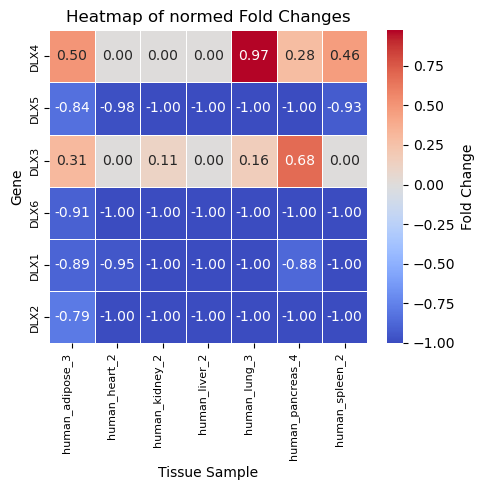

In [85]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed

sns.heatmap(
    normed_fold_changes,  # DataFrame containing fold changes
    annot=True,    # Display numerical values
    fmt=".2f",     # Format numbers (2 decimal places)
    cmap="coolwarm",  # Color map for the heatmap
    linewidths=0.5,   # Add grid lines between cells
    cbar_kws={'label': 'Fold Change'}  # Label for the color bar
)

# Customize the plot
plt.title("Heatmap of normed Fold Changes", fontsize=12)
plt.xlabel("Tissue Sample", fontsize=10)
plt.ylabel("Gene", fontsize=10)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()  # Adjust layout for better fit
plt.show()



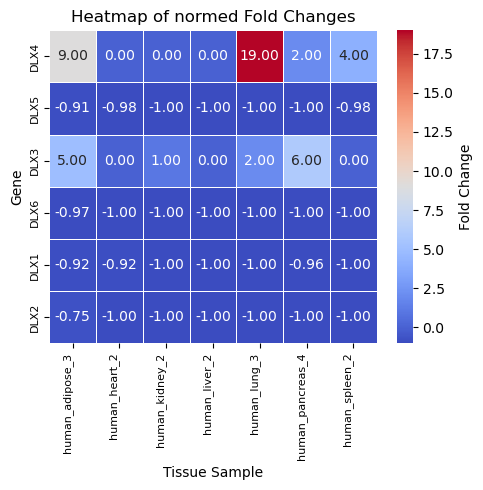

In [86]:
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed

sns.heatmap(
    fold_changes,  # DataFrame containing fold changes
    annot=True,    # Display numerical values
    fmt=".2f",     # Format numbers (2 decimal places)
    cmap="coolwarm",  # Color map for the heatmap
    linewidths=0.5,   # Add grid lines between cells
    cbar_kws={'label': 'Fold Change'}  # Label for the color bar
)

# Customize the plot
plt.title("Heatmap of normed Fold Changes", fontsize=12)
plt.xlabel("Tissue Sample", fontsize=10)
plt.ylabel("Gene", fontsize=10)
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()  # Adjust layout for better fit
plt.show()



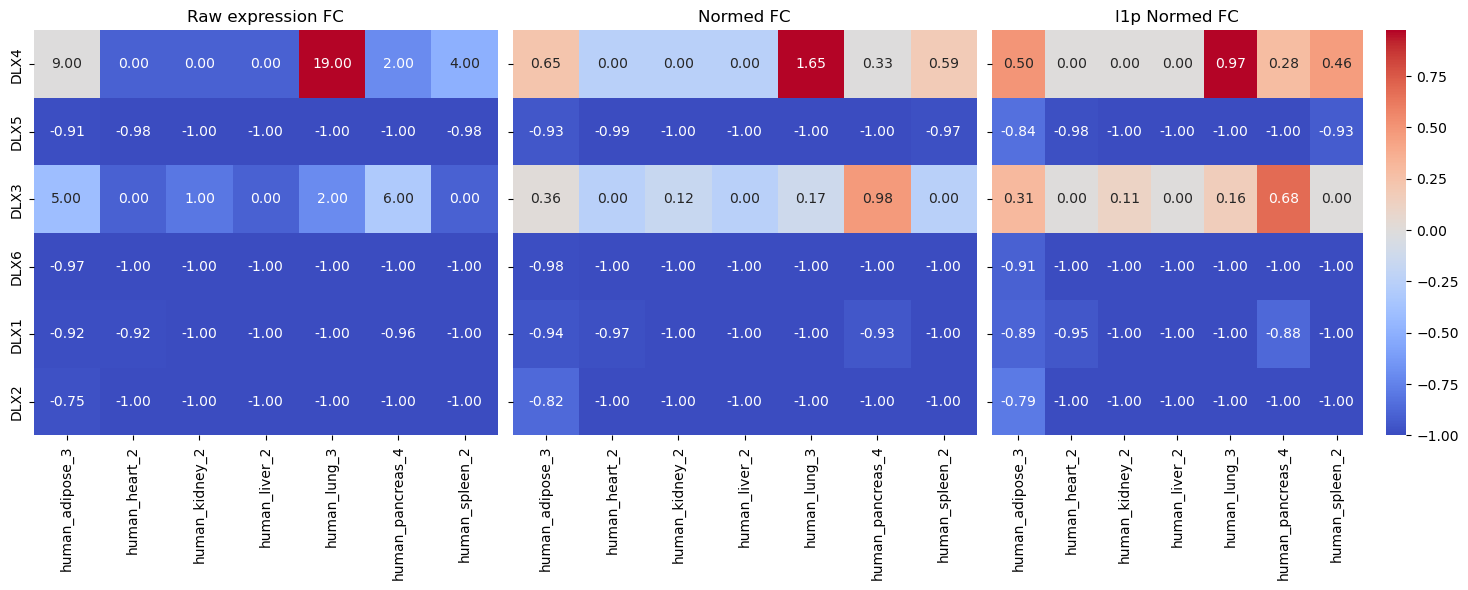

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)  # 1 row, 3 columns

# Plot each heatmap
sns.heatmap(fold_changes, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0], cbar=False)
axes[0].set_title("Raw expression FC")

sns.heatmap(normed_fold_changes, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1], cbar=False)
axes[1].set_title("Normed FC")

sns.heatmap(l1p_normed_fold_changes, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[2], cbar=True)  # Show cbar on last heatmap
axes[2].set_title("l1p Normed FC")

# Adjust layout
plt.tight_layout()
plt.show()

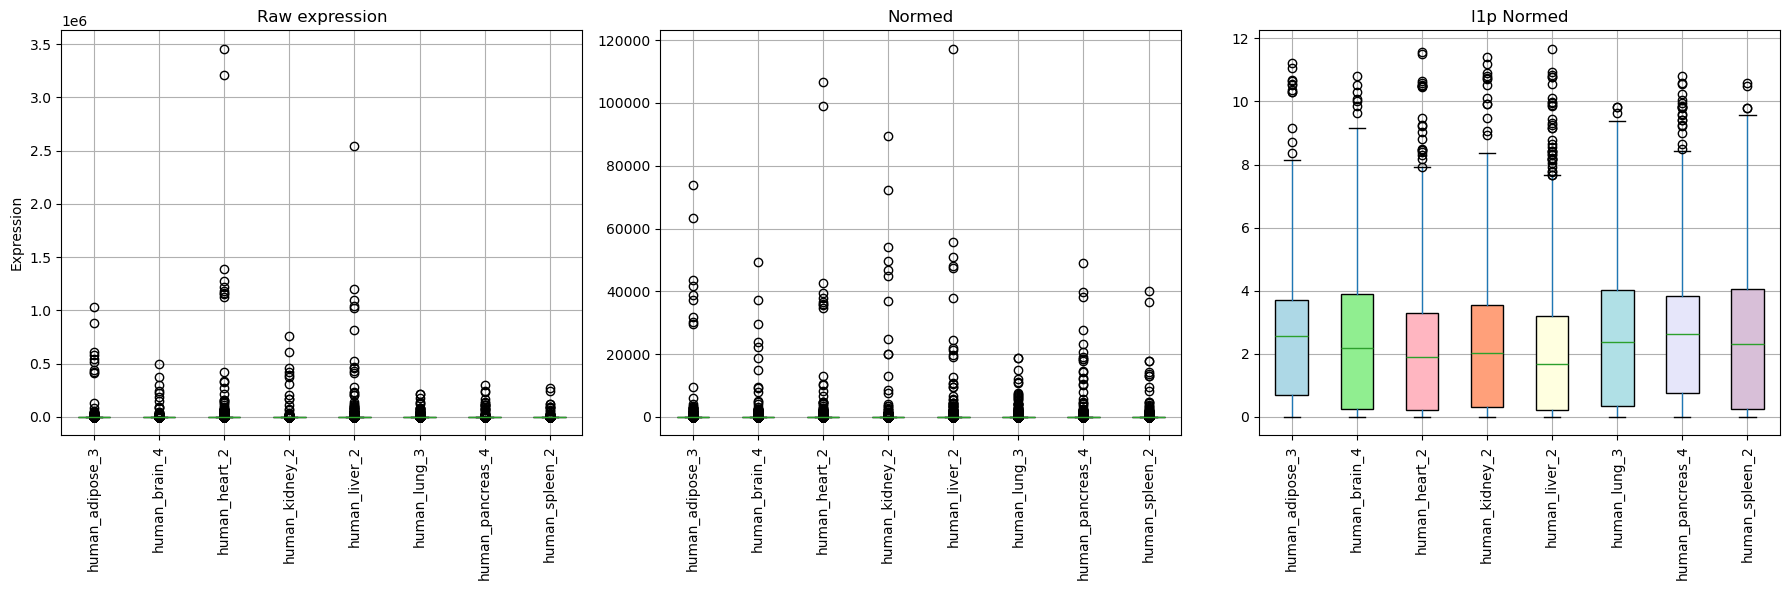

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # 1 row, 3 columns
titles = ['Raw expression', 'Normed', 'l1p Normed']
# Plot each box plot with custom colors
for i, (df, ax) in enumerate(zip([human, normed_human, np.log1p(normed_human)], axes)):
    boxes = df.boxplot(ax=ax, patch_artist=True, return_type="dict", boxprops=dict(color="black"))
    for patch, color in zip(boxes['boxes'], colors):
        patch.set_facecolor(color)
    ax.set_title(f"{titles[i]}")
    if i == 0:  # Set y-axis label only for the first plot
        ax.set_ylabel("Expression")
    ax.set_xticklabels(df.columns, rotation=90)


plt.tight_layout()
plt.show()

